In [1]:
import random_walker as rw
import utils
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from networkx.drawing.nx_agraph import graphviz_layout

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 60}

mpl.rc('font', **font)

/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


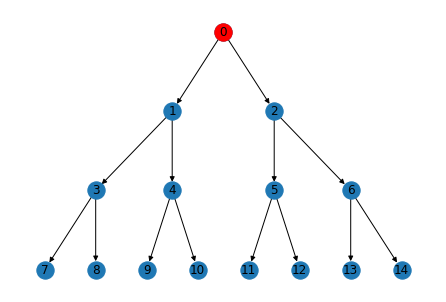

In [2]:
np.random.seed(0)
#Create a regular tree with set offspring factor and height above the root, with edges directed away from root.
offspring_factor=2
height=3
#H,root=utils.balanced_directed_tree(offspring_factor, height)
H,root=utils.balanced_directed_tree(offspring_factor,height)
pos=graphviz_layout(H,prog='dot')
nx.draw(H,pos)
nx.draw_networkx_labels(H,pos)
nx.draw_networkx_nodes(H,pos,nodelist=[root],node_color='r',labels=True)
plt.show()

In [3]:
#In case we want to look at metrics other than Hamming
def metric(*args):
    return rw.hamming_dist(*args)

In [4]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 60}

mpl.rc('font', **font)

[0, 6, 15]
0 15 [0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]
1 15 [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1]
3 15 [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15 [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 15 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1]
6 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1]
7 15 [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8 15 [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 15 [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 15 [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1]
12 15 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
13 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1]
14 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1]


/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
/home/k1801311/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


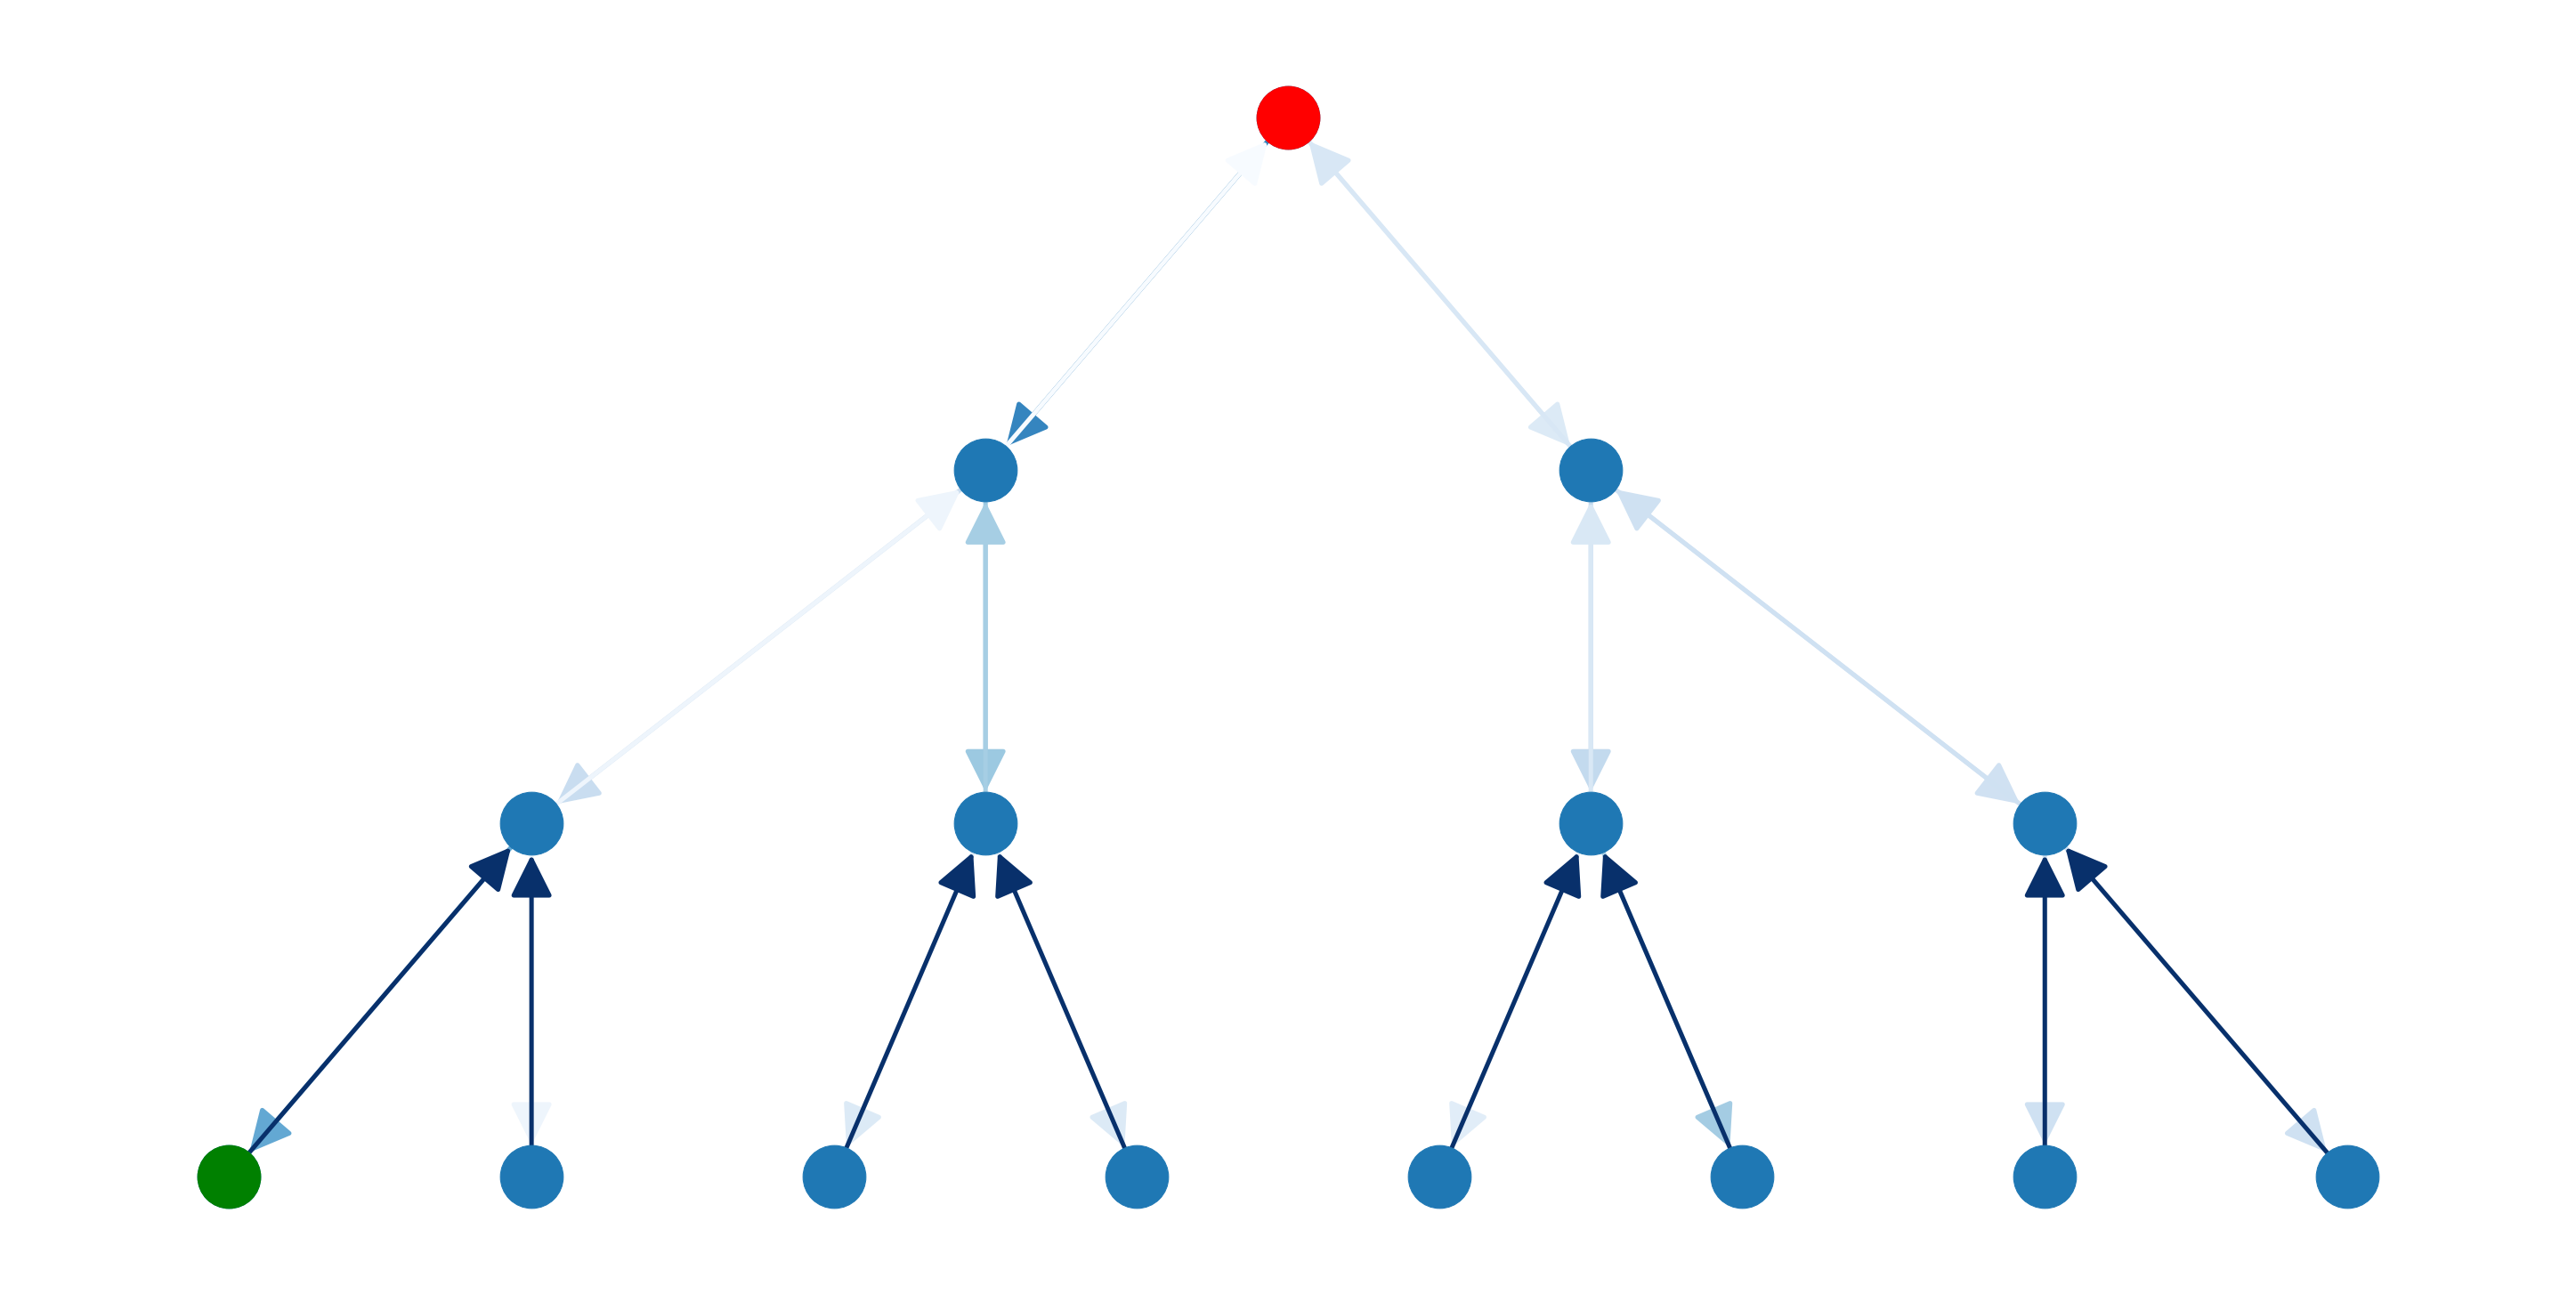

In [5]:
#Create patternWalker based on the above tree.
pattern_len=15 #String/pattern length
flip_rate=5/pattern_len #Bit flipping rate for propagating patterns
G=rw.sectionedPatternWalker(H,root,pattern_len,flip_rate,[0,6,pattern_len],metric=metric)
G.set_weights()
#pos=graphviz_layout(G,prog='dot') #Positions can be taken from H
(edges,weights) = zip(*nx.get_edge_attributes(G,'weight').items())
plt.figure(figsize=(40,20))
nx.draw(G, pos, edgelist=edges, edge_color=weights, node_size=5000,arrowsize=100,width=5.0, edge_cmap=plt.cm.Blues)
#nx.draw_networkx_labels(H,pos,font_size=50)
nx.draw_networkx_nodes(G,pos,nodelist=[root],node_color='r',node_size=5000.)
#Mark target node in green.
nx.draw_networkx_nodes(G,pos,nodelist=[G.target_node],node_color='g',node_size=5000)
plt.savefig('./outputs/demonstrations/tree.png')
plt.show()

In [6]:
print('Number of duplicate strings/Number of strings:', G.num_pattern_duplicates(),'/',len(G))
mfpts_root_leaves=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)])
print('target node:', G.target_node)
mfpts_root_leaves

Number of duplicate strings/Number of strings: 1 / 15
target node: 7


{(0, 7): (23.924371693121678+0j),
 (0, 8): (37.06378968253959+0j),
 (0, 9): (42.66378968253982+0j),
 (0, 10): (42.66378968253982+0j),
 (0, 11): (290.00439814814695+0j),
 (0, 12): (244.01643518518418+0j),
 (0, 13): (305.7640211640224+0j),
 (0, 14): (305.7640211640224+0j)}

In [7]:
#Now, get MFPT for all pairs (root, node)
mfpts_root_all={}
for branch in G.hierarchy_backup.successors(G.root):
    mfpts_root_all[branch]=utils.mfpt(G,[(root,b) for b in nx.descendants(G.hierarchy_backup,branch)])

/home/k1801311/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:844: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/home/k1801311/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/home/k1801311/anaconda3/lib/python3.7/site-packages/matplotlib/transforms.py:1959: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


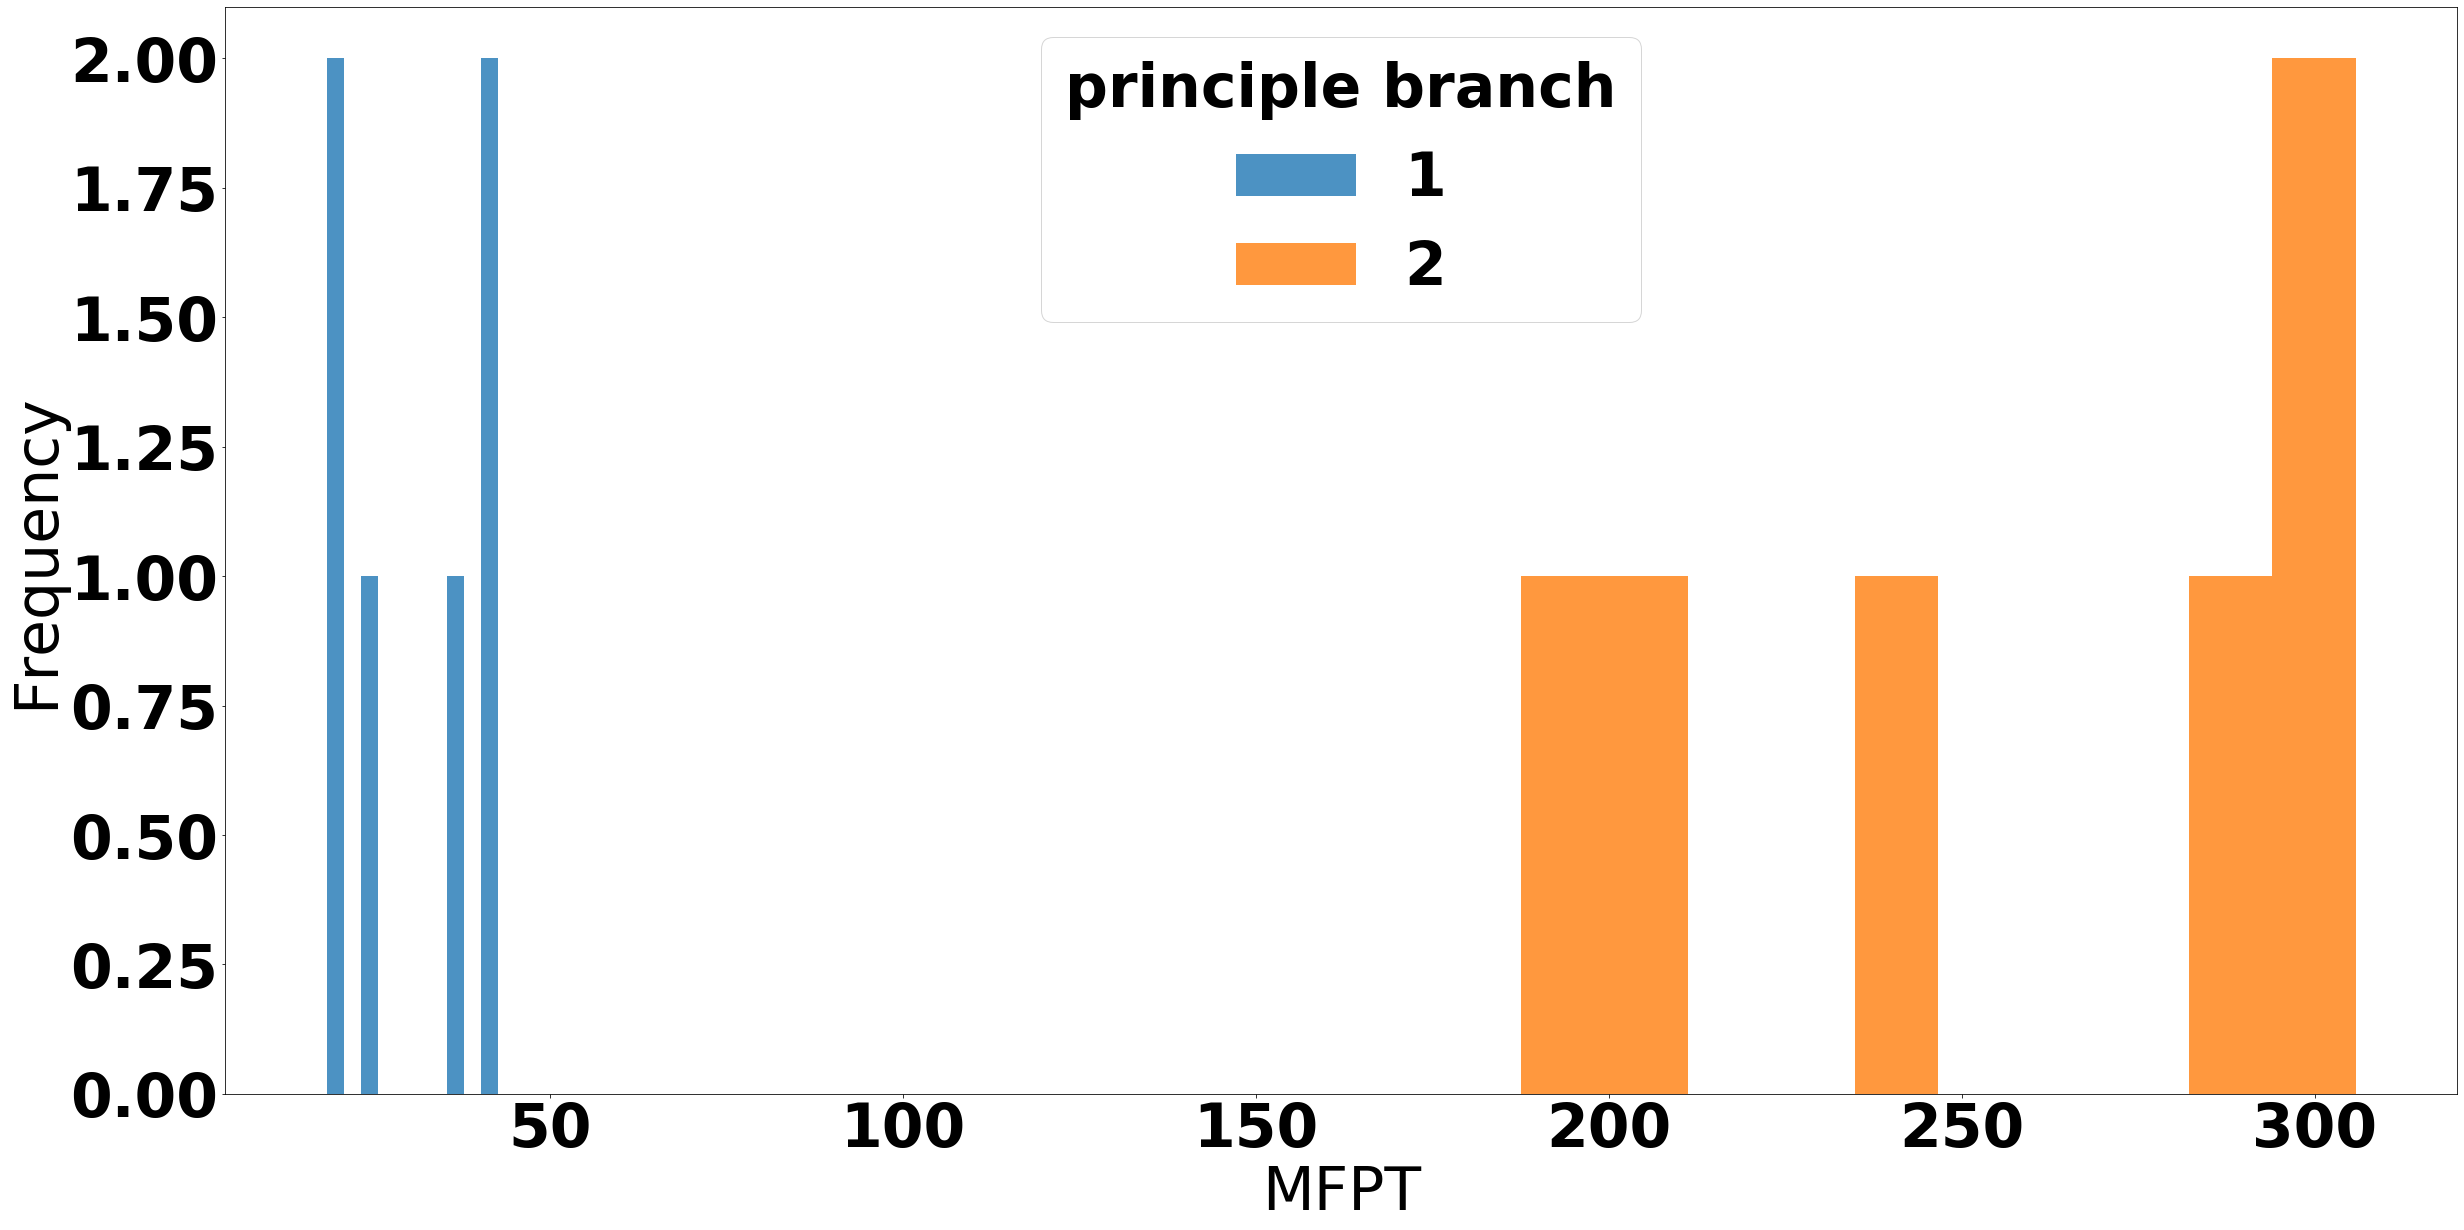

In [8]:

plt.figure(figsize=(40,20))

for branch in G.hierarchy_backup.successors(G.root):
    _=plt.hist(mfpts_root_all[branch].values(),label=str(branch),alpha=0.8)
plt.legend(loc='best', title='principle branch')
plt.xlabel('MFPT')
plt.ylabel('Frequency')
plt.savefig('./outputs/demonstrations/hist_mfpts.png')
plt.show()

In [9]:
#We can also sample over a number realisations of patterns
mfpts_root_leaves_sampling=[]
down_c=[] #downward "current"
up_c=[] #upward "current"
for _ in range(200):
    G.reset_patterns()
    G.set_weights()
    t_temp=utils.mfpt(G,[(root,b) for b in utils.leaves(G.hierarchy_backup)])
    d_temp=utils.downward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),nodelist=G.nodes())
    u_temp=utils.upward_current(G.hierarchy_backup,nx.to_dict_of_dicts(G),nodelist=G.nodes())
    for x in t_temp.values():
        mfpts_root_leaves_sampling.append(x)
    for x in d_temp:
        down_c.append(x)
    for x in u_temp:
        up_c.append(x)
down_c=np.array(down_c)
up_c=np.array(up_c)

[0, 6, 15]
0 15 [1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0]
1 15 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1]
3 15 [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15 [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1]
6 15 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]
7 15 [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8 15 [1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 15 [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 15 [0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
12 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0]
13 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0]
14 15 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1]
[0, 6, 15]
0 15 [0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0]
1 15 [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0]
3 15 [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15

1 15 [1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1]
3 15 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15 [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0]
6 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]
7 15 [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8 15 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 15 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 15 [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1]
12 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0]
13 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1]
14 15 [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1]
[0, 6, 15]
0 15 [1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]
1 15 [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0]
3 15 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 15 [0, 0, 0, 

[0, 6, 15]
0 15 [0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0]
1 15 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0]
3 15 [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15 [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 15 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
6 15 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1]
7 15 [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8 15 [1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 15 [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 15 [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0]
12 15 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0]
13 15 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
14 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]
[0, 6, 15]
0 15 [1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1]
1 15 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1]
3 15 [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15

10 15 [0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0]
12 15 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]
13 15 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0]
14 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1]
[0, 6, 15]
0 15 [1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1]
1 15 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1]
3 15 [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0]
6 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1]
7 15 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8 15 [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 15 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 15 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0]
12 15 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0]
13 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1]
14 15 [0, 0

7 15 [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8 15 [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 15 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 15 [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
12 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0]
13 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
14 15 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0]
[0, 6, 15]
0 15 [0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1]
1 15 [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1]
3 15 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15 [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 15 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]
6 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1]
7 15 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8 15 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 15 [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 15 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0

[0, 6, 15]
0 15 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0]
1 15 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]
3 15 [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 15 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]
6 15 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]
7 15 [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8 15 [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 15 [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 15 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0]
12 15 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1]
13 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1]
14 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0]
[0, 6, 15]
0 15 [1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1]
1 15 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0]
3 15 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15

[0, 6, 15]
0 15 [0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1]
1 15 [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1]
3 15 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 15 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1]
6 15 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
7 15 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8 15 [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 15 [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 15 [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]
12 15 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1]
13 15 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]
14 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]
[0, 6, 15]
0 15 [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1]
1 15 [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1]
3 15 [1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15

10 15 [0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0]
12 15 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1]
13 15 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0]
14 15 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1]
[0, 6, 15]
0 15 [0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0]
1 15 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
3 15 [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15 [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0]
6 15 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
7 15 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8 15 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 15 [1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 15 [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1]
12 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
13 15 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0]
14 15 [0, 0

[0, 6, 15]
0 15 [0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
1 15 [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0]
3 15 [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15 [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0]
6 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1]
7 15 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8 15 [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 15 [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 15 [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1]
12 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1]
13 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
14 15 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0]
[0, 6, 15]
0 15 [1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0]
1 15 [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0]
3 15 [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15

[0, 6, 15]
0 15 [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]
1 15 [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1]
3 15 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 15 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
6 15 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1]
7 15 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8 15 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 15 [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 15 [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1]
12 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0]
13 15 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]
14 15 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0]
[0, 6, 15]
0 15 [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1]
1 15 [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0]
3 15 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15

[0, 6, 15]
0 15 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0]
1 15 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0]
3 15 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15 [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0]
6 15 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0]
7 15 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8 15 [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 15 [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 15 [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
12 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1]
13 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]
14 15 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0]
[0, 6, 15]
0 15 [0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]
1 15 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1]
3 15 [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15

[0, 6, 15]
0 15 [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1]
1 15 [1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1]
3 15 [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15 [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 15 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1]
6 15 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1]
7 15 [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8 15 [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 15 [1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 15 [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1]
12 15 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1]
13 15 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1]
14 15 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1]
[0, 6, 15]
0 15 [1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1]
1 15 [1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1]
3 15 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15

13 15 [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1]
14 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
[0, 6, 15]
0 15 [0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1]
1 15 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 15 [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1]
3 15 [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 15 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5 15 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1]
6 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0]
7 15 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
8 15 [1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9 15 [1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
10 15 [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11 15 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1]
12 15 [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1]
13 15 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0]
14 15 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0]
[0, 6, 15]
0 15 [0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1]
1 15 [0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 

/home/k1801311/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:897: ComplexWarning: Casting complex values to real discards the imaginary part
  db = np.array(np.diff(bin_edges), float)
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


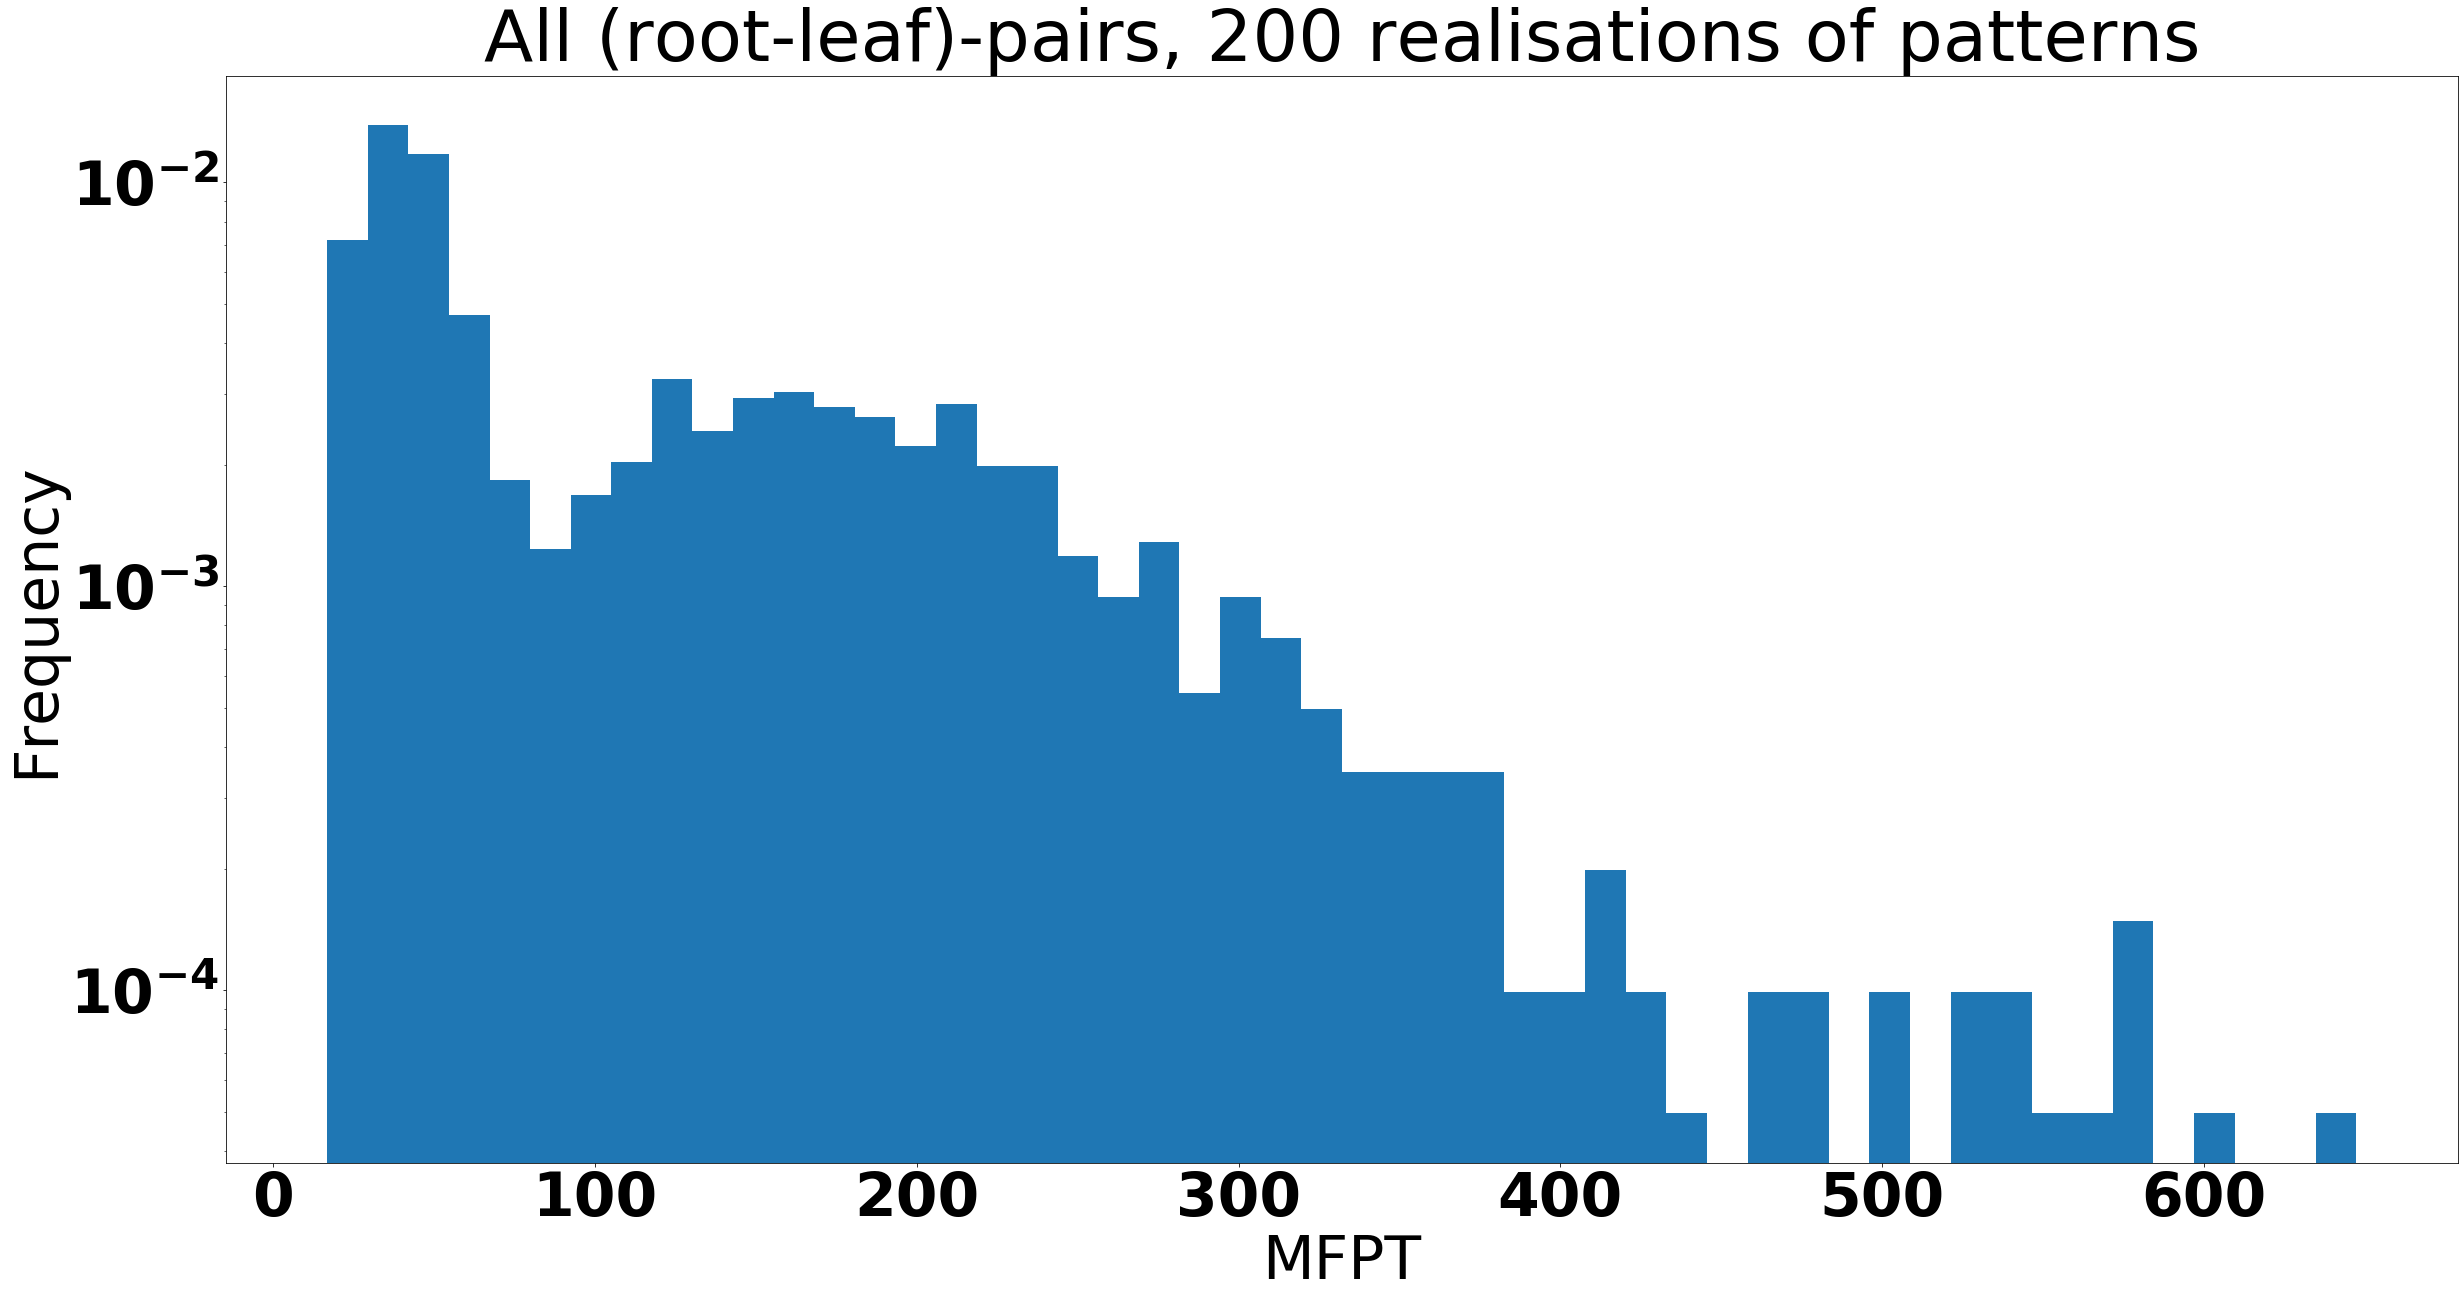

In [10]:
plt.figure(figsize=(40,20))
_=plt.hist(mfpts_root_leaves_sampling,bins=50,density=True)
plt.yscale('log')
#plt.xscale('log')
plt.xlabel('MFPT')
plt.ylabel('Frequency')
plt.title('All (root-leaf)-pairs, 200 realisations of patterns')
plt.savefig('./outputs/demonstrations/hist_all_mfpts.png')
plt.show()

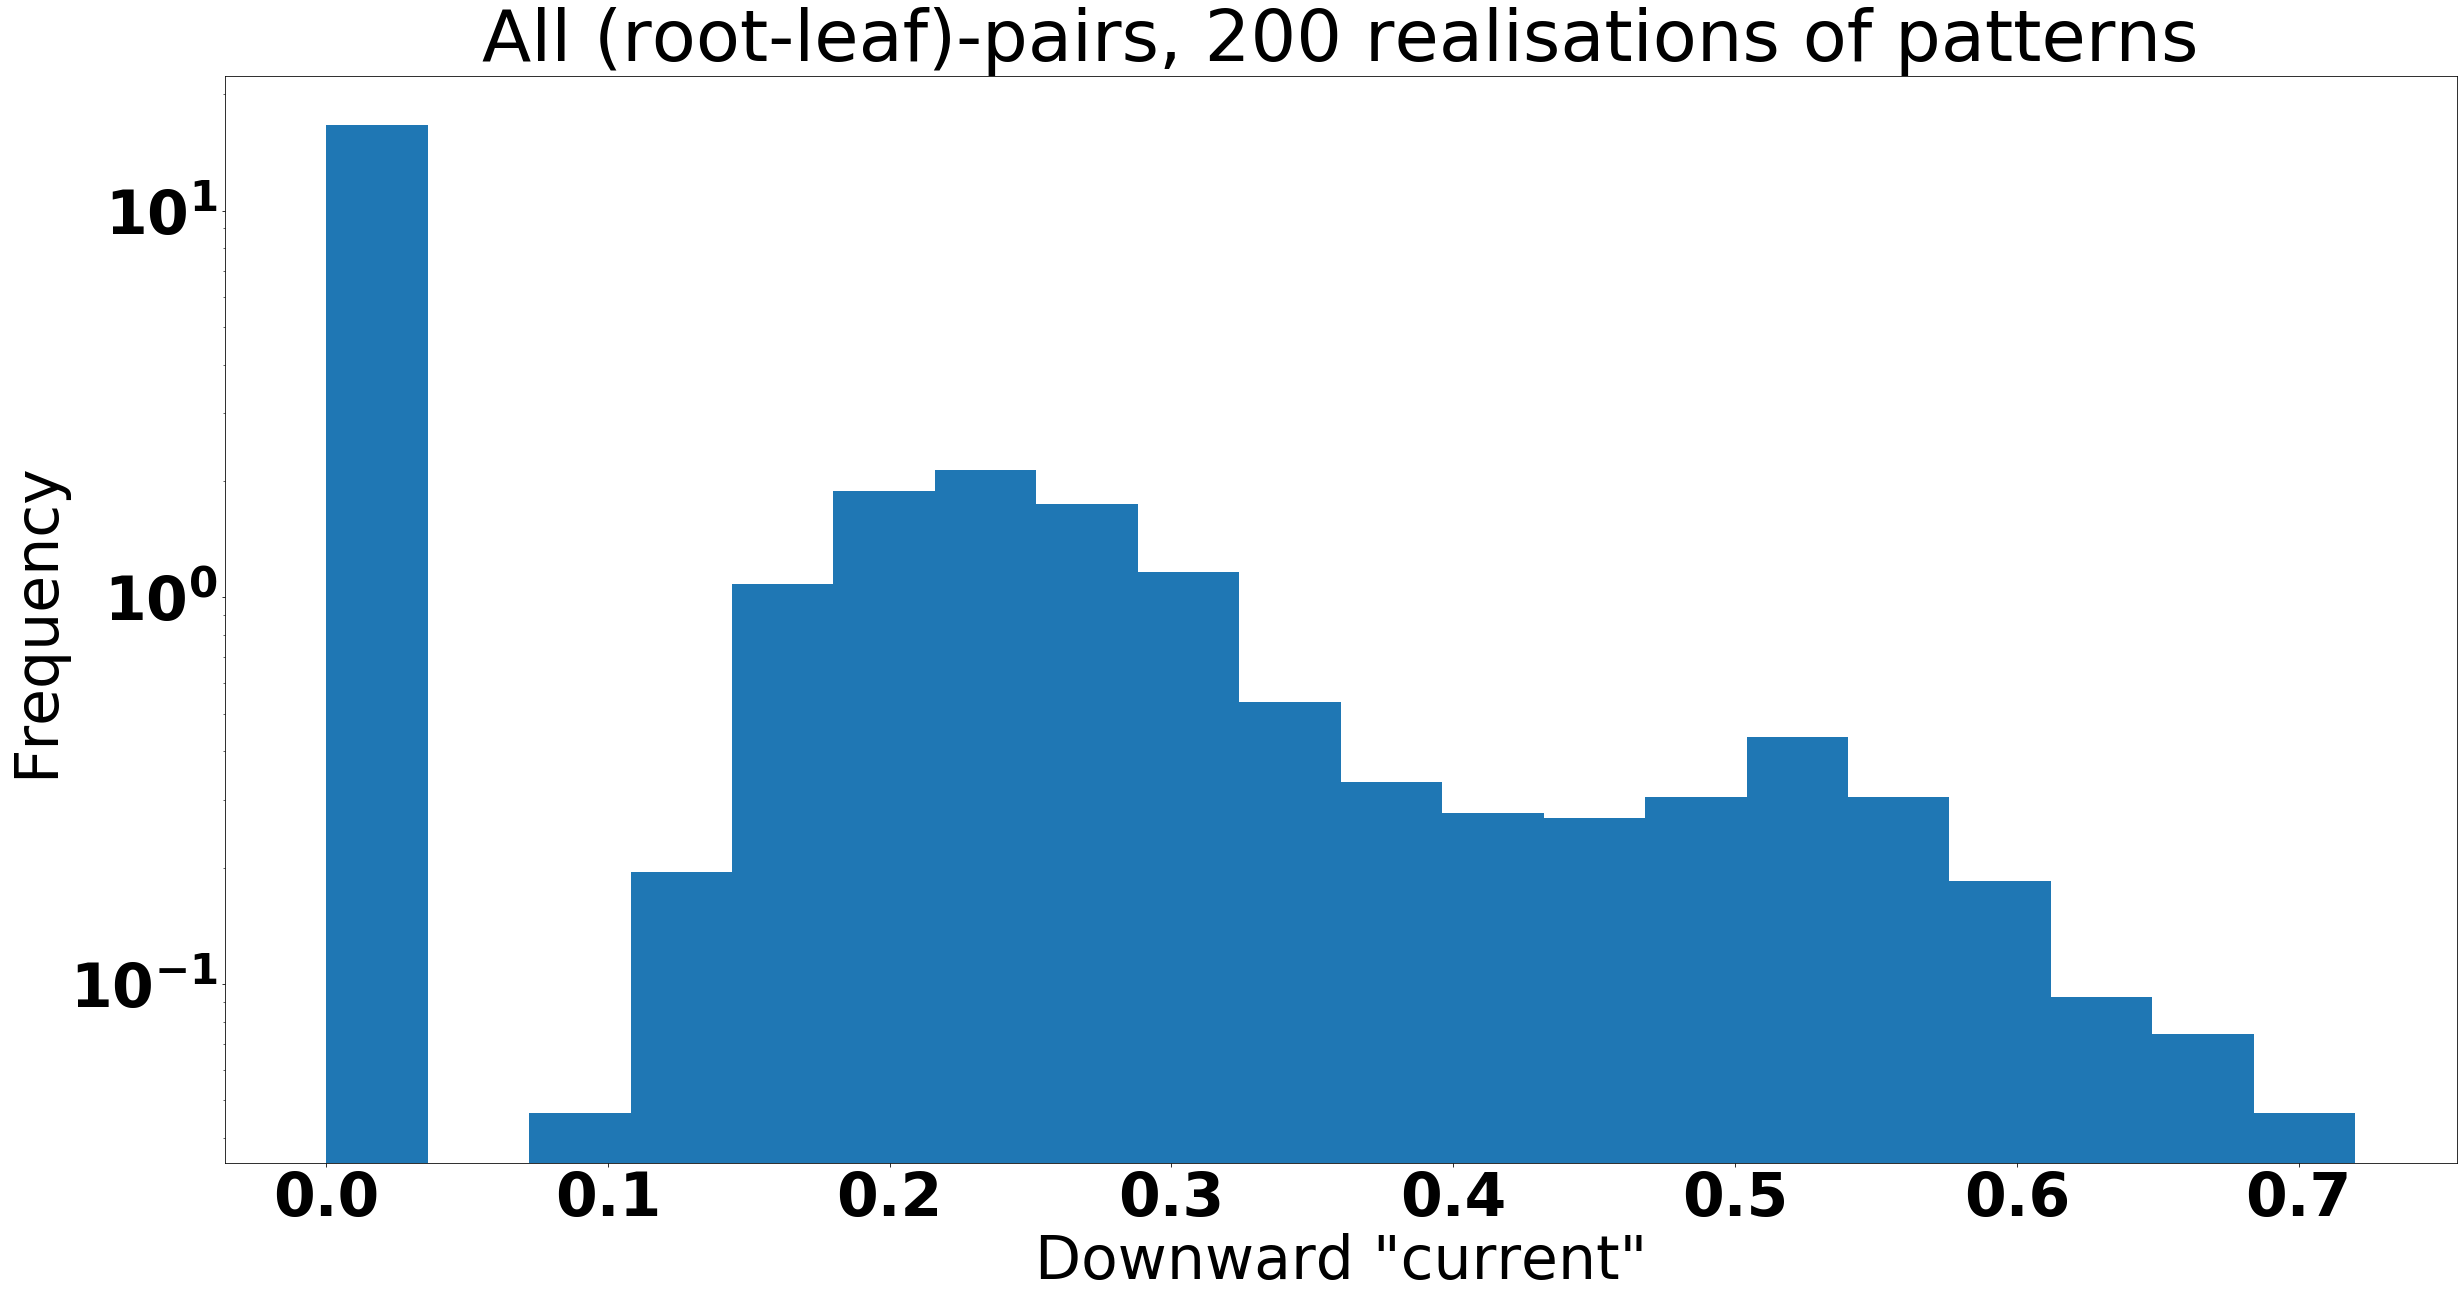

In [11]:
plt.figure(figsize=(40,20))
_=plt.hist(down_c,bins=20,density=True)
plt.xlabel('Downward "current"')
plt.ylabel('Frequency')
plt.yscale('log')
#plt.xscale('log')
plt.title('All (root-leaf)-pairs, 200 realisations of patterns')
plt.savefig('./outputs/demonstrations/hist_all_down_c.png')
plt.show()

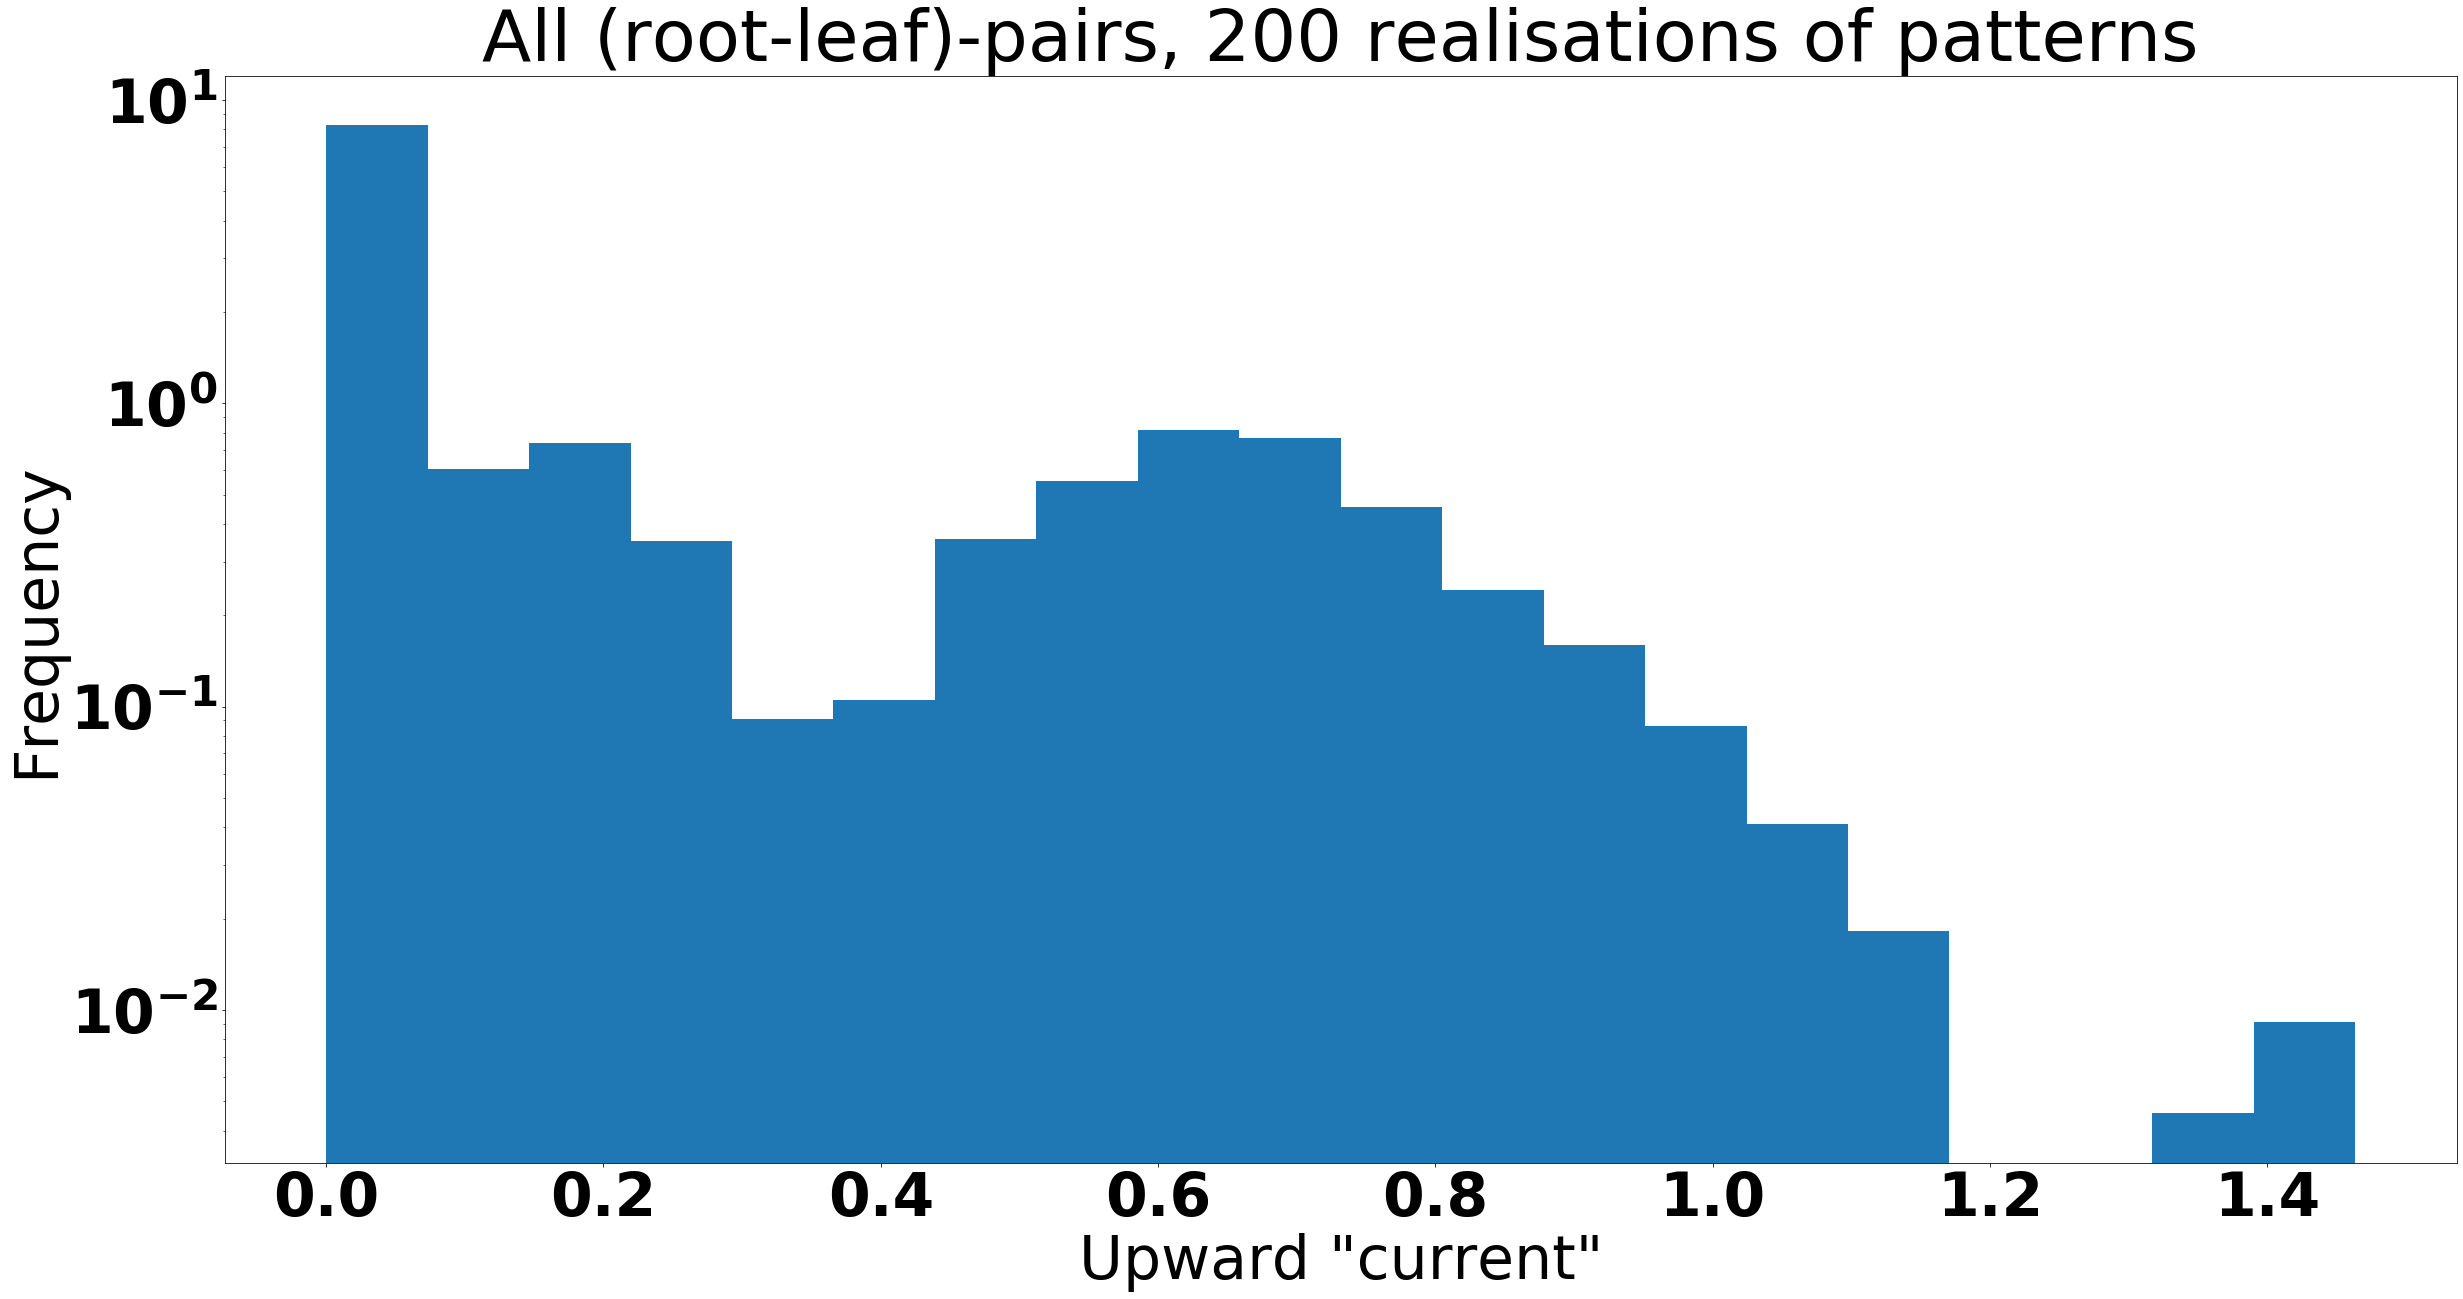

In [12]:
plt.figure(figsize=(40,20))
_=plt.hist(up_c,bins=20,density=True)
plt.xlabel('Upward "current"')
plt.ylabel('Frequency')
plt.yscale('log')
#plt.xscale('log')
plt.title('All (root-leaf)-pairs, 200 realisations of patterns')
plt.savefig('./outputs/demonstrations/hist_all_up_c.png')
plt.show()

In [13]:
#This indexing is not alright!

root_block=[0]
first_block=[1]+[x for x in nx.descendants(G.hierarchy_backup,1)]
second_block=[2]+[x for x in nx.descendants(G.hierarchy_backup,2)]
blocking=np.array(root_block+first_block+second_block)

M=utils.normalised_laplacian(G)[blocking]
M=M[:,blocking]

In [14]:
#Needed to see if a certain formula for the MP inverse of the normalised graph Laplacian holds true.

A=M[root_block,root_block]
B=np.squeeze(np.array(M[root_block,len(root_block):]))
C=np.squeeze(np.array(M[len(root_block):,root_block]))
D1=M[len(root_block):len(root_block+first_block),len(root_block):len(root_block+first_block)]
D2=M[len(root_block+first_block):,len(root_block+first_block):]

D=np.zeros((len(D1)+len(D2),len(D1)+len(D2)))
D[:len(D1),:len(D1)]=D1
D[len(D1):,len(D1):]=D2

a=np.linalg.pinv(A)
F=D-np.matmul(C,B)
f=np.linalg.pinv(F)

m=np.zeros(M.shape)
m[0,0]=1+np.matmul(np.matmul(B,f), C)
m[0,1:]=-np.matmul(B,f)
m[1:,0]=-np.matmul(f,C)
m[1:,1:]=f
print(m)
print(np.linalg.norm(m-np.linalg.pinv(M)))

[[ 1.26251498e+00  2.93426830e-01 -7.27286082e-02 -8.93747033e-02
  -9.94381812e-02 -9.30820361e-02 -1.05406870e-01 -1.05406870e-01
   3.55179875e-01  7.14590251e-03 -2.32423648e-02 -4.81259504e-02
  -4.76078742e-02 -6.56698766e-02 -6.48878127e-02]
 [ 2.93426830e-01  1.76711063e+00  1.51043544e+00  1.18560626e+00
   8.96530382e-01  7.64525287e-01  6.19766204e-01  6.19766204e-01
  -9.88795141e-01 -1.54589359e+00 -1.38102491e+00 -9.25829705e-01
  -1.03790662e+00 -9.01292863e-01 -8.54823848e-01]
 [-7.27286082e-02  1.51043544e+00  4.59494414e+00  4.71259046e-01
   2.85097548e+00  2.44939855e+00  1.35195569e-01  1.35195569e-01
  -1.63114031e+00 -2.55014335e+00 -2.27817201e+00 -1.52727101e+00
  -1.71215579e+00 -1.48679445e+00 -1.41013804e+00]
 [-8.93747033e-02  1.18560626e+00  4.71259046e-01  3.81580965e+00
   1.85430365e-01  1.44244497e-01  2.15839729e+00  2.15839729e+00
  -1.35878782e+00 -2.12434436e+00 -1.89778424e+00 -1.27226164e+00
  -1.42627610e+00 -1.23854347e+00 -1.17468643e+00]
 [-9

/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  # This is added back by InteractiveShellApp.init_path()
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: ComplexWarning: Casting complex values 

In [15]:
#root_block=[0]
first_block=[0,1]+[x for x in nx.descendants(G.hierarchy_backup,1)]
second_block=[2]+[x for x in nx.descendants(G.hierarchy_backup,2)]
blocking=np.array(first_block+second_block)

M=utils.normalised_laplacian(G)[blocking]
M=M[:,blocking]

#Needed to see if a certain formula for the MP inverse of the normalised graph Laplacian holds true.

A=M[first_block,first_block]
B=np.zeros((len(first_block),len(second_block))) #np.squeeze(np.array(M[first_block,len(first_block):]))
C=np.squeeze(np.array(M[len(first_block):,first_block]))
#D1=M[len(root_block):len(root_block+first_block),len(root_block):len(root_block+first_block)]
D=M[len(first_block):,len(first_block):]

a=np.linalg.pinv(A)
F=D-np.matmul(C,B)
f=np.linalg.pinv(F)

m=np.zeros(M.shape)
m[:len(first_block),:len(first_block)]=1+np.matmul(np.matmul(B,f), C)
m[:len(first_block),len(first_block):]=-np.matmul(B,f)
m[len(first_block):,:len(first_block)]=-np.matmul(f,C)
m[len(first_block):,len(first_block):]=f
print(m)
print(np.linalg.norm(m-np.linalg.pinv(M)))

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [ 1

/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: ComplexWarning: Casting complex values to real discards the imaginary part
/home/k1801311/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: ComplexWarning: Casting complex values to real discards the imaginary part
